<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v1/blob/main/52W_HighLow_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yahooquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.3 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.1
    Uninstalling lxml-5.3.1:
      Successfully uninstalled lxml-5.3.1


In [64]:
import yahooquery as yq
import pandas as pd
from datetime import datetime, timedelta
from google.colab import data_table

def get_past_stock_data(tickers, target_date):
    """
    Fetches closing price, past 52-week high, and past 52-week low for given tickers on a specific historical date.

    Parameters:
    - tickers (list): List of stock symbols (e.g., ['AAPL', 'MSFT']).
    - target_date (str): The historical date in 'YYYY-MM-DD' format.

    Returns:
    - DataFrame with stock, target date, closing price, past 52W high, and past 52W low.
    """

    # Convert target_date to datetime
    target_date = datetime.strptime(target_date, '%Y-%m-%d')

    # Define 52-week lookback period
    past_52w_start = target_date - timedelta(days=365)
    past_52w_end = target_date + timedelta(days=1)

    stock_data = []

    for ticker in tickers:
        try:
            # Fetch historical data covering the past 52 weeks before the target date
            historical = yq.Ticker(ticker+'.NS').history(start=past_52w_start.strftime('%Y-%m-%d'),
                                                   end=past_52w_end.strftime('%Y-%m-%d'))

            #print(historical)

            if historical.empty:
                print(f"No data available for {ticker}")
                continue

            # Convert date to datetime for filtering
            historical = historical.reset_index()
            historical['date'] = pd.to_datetime(historical['date'])

            # Get closing price on the target date
            closing_price_row = historical[historical['date'] == target_date]
            closing_price = closing_price_row['close'].iloc[0] if not closing_price_row.empty else None

            # Compute 52-week high & low based on past data up to that point
            historical_past_52w = historical[historical['date'] <= target_date]
            high_52w = historical_past_52w['high'].max()
            low_52w = historical_past_52w['low'].min()

            stock_data.append({
                'Stock': ticker,
                'Date': target_date.strftime('%Y-%m-%d'),
                'Close': closing_price,
                '52W_H': high_52w,
                '52W_L': low_52w,
                '52W_H%': round(((high_52w -closing_price) / (high_52w-low_52w)) * 100,0) if closing_price else None,
                '52W_L%': round(((closing_price- low_52w) / (high_52w-low_52w)) * 100,0) if closing_price else None
            })

        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")

    return pd.DataFrame(stock_data)

# function to fetch my prospects csv
def get_mypps_df():
  mypps_df = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Tradevesting_v1/main/data/myProspectsScrips.csv')
  return mypps_df

# function to fetch screener data
def get_myscreen_df():
  myscreen_df = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Tradevesting_v1/main/data/myScreenerDB.csv')
  return myscreen_df

pps_df = get_mypps_df()
scr_df = get_myscreen_df()

df = pd.merge(pps_df, scr_df, on = 'Symbol')

stock_list = df[(df['Conviction'].isin(['X','H'])) & ((df['CapType'] == 'LC'))]['Symbol'].values

#stock_list = ["RELIANCE", "TCS", "INFY", "HDFCBANK"]


# Example usage
tickers = ['TCS', 'RELIANCE', 'HDFCBANK']
historical_date = '2021-10-18'  # Change this to any historical date
df = get_past_stock_data(stock_list, historical_date)
data_table.DataTable(df, include_index=False)

No data available for LICI
No data available for UNITDSPR


,Stock,Date,Close,52W_H,52W_L,52W_H%,52W_L%
0,ABB,2021-10-18,1829.500000,1943.900024,857.049988,11.0,89.0
1,APOLLOHOSP,2021-10-18,4330.399902,5198.000000,1986.000000,27.0,73.0
2,ASIANPAINT,2021-10-18,3241.500000,3505.000000,2056.500000,18.0,82.0
3,AXISBANK,2021-10-18,813.299988,820.700012,476.250000,2.0,98.0
4,BAJAJ-AUTO,2021-10-18,3915.949951,4361.399902,2822.449951,29.0,71.0
5,BAJAJFINSV,2021-10-18,1867.795044,1910.000000,551.104980,3.0,97.0
6,BAJAJHLDNG,2021-10-18,4773.299805,5100.000000,2212.649902,11.0,89.0
7,BAJFINANCE,2021-10-18,7865.549805,8050.000000,3101.350098,4.0,96.0
8,BHARTIARTL,2021-10-18,680.599976,739.122986,386.738983,17.0,83.0
9,BRITANNIA,2021-10-18,3837.350098,4153.000000,3317.300049,38.0,62.0


In [65]:
df[df['52W_L%'] < 20].shape[0]*100/df.shape[0]

0.0

In [66]:
df['52W_L%'].mean()

np.float64(84.91666666666667)

<Axes: >

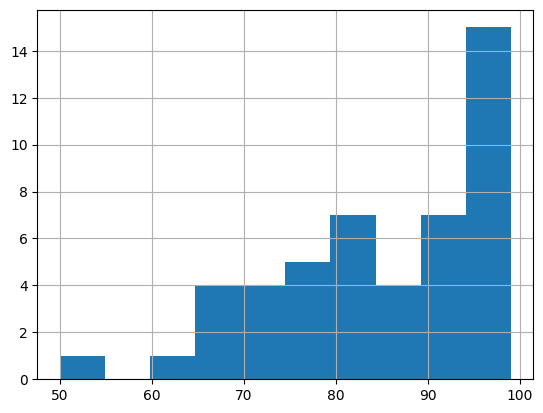

In [67]:
df['52W_L%'].hist()